# March 2020 Dataset of Ford GoBike System

It is a public bicycle sharing platform in SanFransisco. The bicycles are available for the people at any point of time for easy and reasonable transportation.

In [22]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [23]:
#reading the csv file
df=pd.read_csv('202003-baywheels-tripdata.csv')

In [24]:
#viewing the first few lines of the dataset
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,35187,2020-03-31 20:42:10.0790,2020-04-01 06:28:37.8440,462.0,Cruise Terminal at Pier 27,37.804648,-122.402087,24.0,Spear St at Folsom St,37.789677,-122.390428,10982,Customer,NaN
1,14568,2020-03-31 22:45:25.5010,2020-04-01 02:48:13.7730,42.0,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,370.0,Jones St at Post St,37.787327,-122.413278,12617,Customer,NaN
2,35990,2020-03-31 15:08:22.3310,2020-04-01 01:08:12.9900,391.0,1st St at Younger Ave,37.355030,-121.904436,397.0,Gish Rd at 1st St,37.361867,-121.909315,12812,Customer,NaN
3,1068,2020-03-31 23:55:00.4260,2020-04-01 00:12:49.0200,456.0,Arguello Blvd at Geary Blvd,37.781468,-122.458806,107.0,17th St at Dolores St,37.763015,-122.426497,12955,Customer,NaN
4,3300,2020-03-31 23:00:55.6410,2020-03-31 23:55:56.6110,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,24.0,Spear St at Folsom St,37.789677,-122.390428,13050,Customer,NaN


In [25]:
#checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176799 entries, 0 to 176798
Data columns (total 14 columns):
duration_sec               176799 non-null int64
start_time                 176799 non-null object
end_time                   176799 non-null object
start_station_id           110696 non-null float64
start_station_name         111349 non-null object
start_station_latitude     176799 non-null float64
start_station_longitude    176799 non-null float64
end_station_id             111097 non-null float64
end_station_name           111794 non-null object
end_station_latitude       176799 non-null float64
end_station_longitude      176799 non-null float64
bike_id                    176799 non-null int64
user_type                  176799 non-null object
rental_access_method       114269 non-null object
dtypes: float64(6), int64(2), object(6)
memory usage: 18.9+ MB


In [26]:
#num of rows and columns
df.shape

(176799, 14)

# Cleaning

In [27]:
#converting start time and end time to time stamp

df.start_time=pd.to_datetime(df.start_time)
df.end_time=pd.to_datetime(df.end_time)

In [28]:
df['starting_hour']=df.start_time.dt.hour
df['duration_in_min']=df.duration_sec/60
df['starting_day']=df.start_time.dt.strftime('%a')
df['starting_month']=df.start_time.dt.strftime('%b')

# Our point of interest for the data analysis

1. Most common start stations
2. Most common end stations
3. The average duration of riding
4. The average distance travelled
5. Maximum distance travelled
6. Minimum distance travelled


What is the minimun distance travelled?

In [29]:
#minimum distance travelled
df.duration_sec.min()

60

What is the maximum distance travelled?

In [30]:
#maximum distance travelled
df.duration_sec.max()

84450

# Univariate plots

Which are the most common start station?

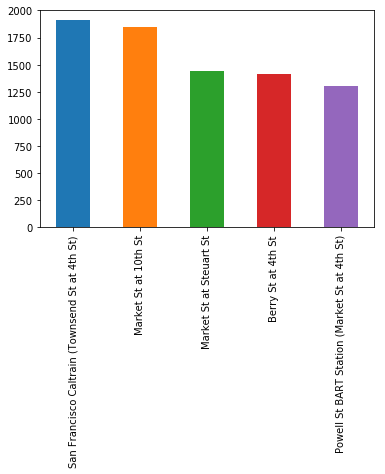

In [31]:
#most common start station
df.start_station_name.value_counts()[0:5].plot(kind='bar')

From the above plot,we can analyze that the most common start station is San Fransisco Caltrain with the count of about 2000. 

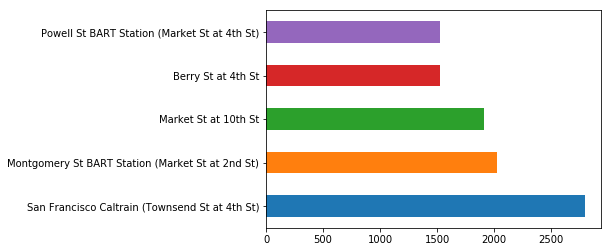

In [32]:
#most common end station
df.end_station_name.value_counts()[0:5].plot(kind='barh')

The most common end station is also San Francisco with count above 2500.

Which are the most active hours of the day?

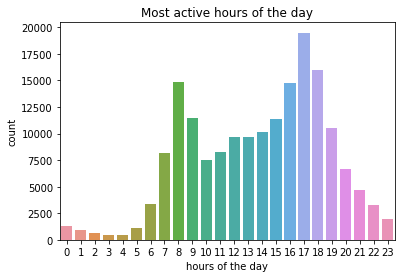

In [33]:
#using seaborn countplot for plotting
sns.countplot(df.starting_hour)
plt.xlabel('hours of the day')
plt.ylabel('count')
plt.title('Most active hours of the day')
plt.show()

The most active hour is 5pm.
The least active hours are 3am and 4am.

Is the subscriber count more or the customer count? lets check!

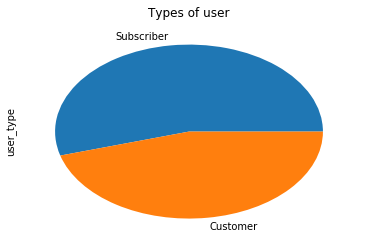

In [34]:
#using pie chart for analyzing the question
df.user_type.value_counts().plot(kind='pie')
plt.title('Types of user');

The subscriber count is more than that of the customer count.

# Bivariate Plots

As we saw there are tow types of users, customers and subscribers.
What is the duration of rides of both of them?

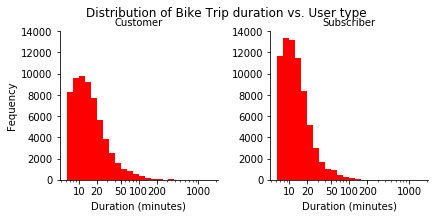

In [35]:
#defining the bin size
bin_size = 10 ** np.arange(0.8, np.log10(df.duration_in_min.max()) + 0.1, 0.1)
#plotting the graphs
plot = sns.FacetGrid(data = df, col = "user_type")
plot.map(plt.hist, "duration_in_min", bins = bin_size, color='red')
plot.fig.suptitle("Distribution of Bike Trip duration vs. User type", y = 1)
plot.set_axis_labels("Duration (minutes)", "Fequency")
#here, we are normalizing the data for a better plot
plt.xscale('log')
tick_locs = [10, 20,50, 100, 200, 1000]
plt.xticks(tick_locs, tick_locs)
plot.set_titles('{col_name}');


The frequency for the subscriber is a little higher than that of the customer.

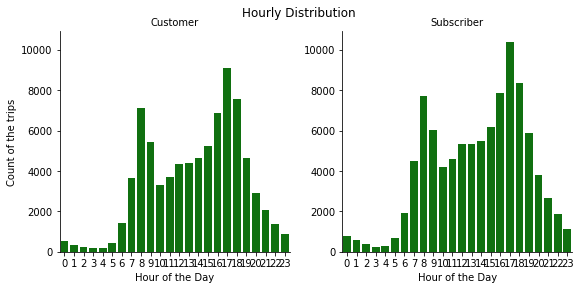

In [36]:
#using seaborn factorplot for a better visualization
plot2 = sns.factorplot(data = df, x = "starting_hour", col = "user_type", 
               kind = "count", color = 'green')
plot2.fig.suptitle("Hourly Distribution", y = 1)
plot2.set_axis_labels("Hour of the Day", "Count of the trips")
plot2.set_titles("{col_name}");

The hour distribution for both user types is almost same.

# Multivariate Plots using heat maps

Which will be the most active hours of the days of the week for the two kinds of users?

In [37]:
#creatinf function for avoiding repetition of the code
def heatMap(x):
    df2 = df[df.user_type == x].groupby(["starting_hour", "starting_day"]).bike_id.size().reset_index()
    
    df2 = df2.pivot("starting_hour", "starting_day",'bike_id')
    
    sns.heatmap(df2, cmap="Blues")
    plt.title(x, y=1)
    plt.xlabel('Days of the week')
    plt.ylabel('Starting time in hour')

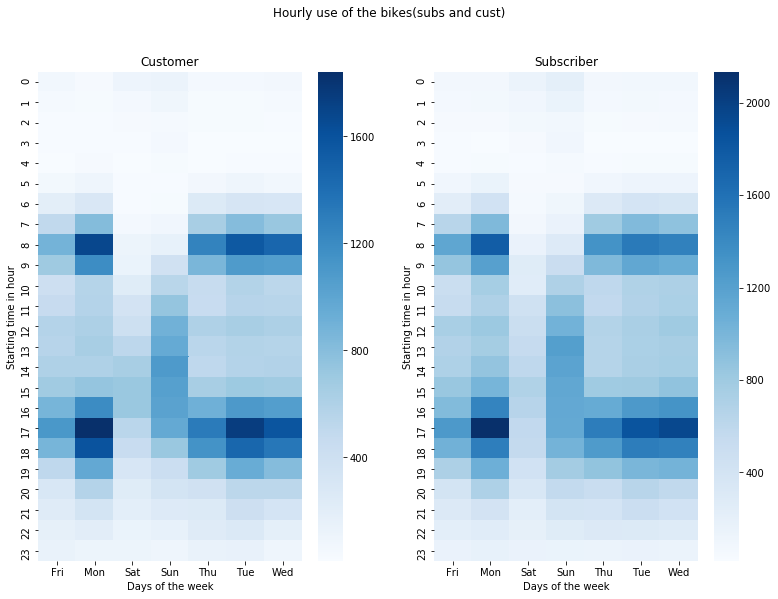

In [38]:
#by using the above function we avoid the repetition of code
plt.figure(figsize=(13,9))
plt.suptitle('Hourly use of the bikes(subs and cust)')
plt.subplot(1, 2, 1)
heatMap('Customer') #using the function 
plt.subplot(1, 2, 2)
heatMap('Subscriber')#using the function


We can conclude that the number of trips varies according to the time as well as the day of the week.
The dark color depicts the more number of trips. We can see they are on Mondays and Tuesdays.


What will be the average trip duration with user-type and hours?

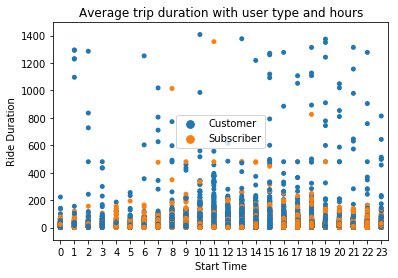

In [39]:
#using stripplot for calculating average trip duration with user-type and hours
sns.stripplot(data=df, x='starting_hour', y='duration_in_min', hue='user_type')
plt.title('Average trip duration with user type and hours')
plt.xlabel('Start Time')
plt.ylabel('Ride Duration')
plt.legend()
plt.show()

In [40]:
!jupyter nbconvert Ford_GoBike_Exploration.ipynb --to slides --post serve --template output_toggle.tpl

[NbConvertApp] Converting notebook Ford_GoBike_Exploration.ipynb to slides
[NbConvertApp] Writing 487699 bytes to Ford_GoBike_Exploration.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "/opt/conda/bin/jupyter-nbconvert", line 11, in <module>
    sys.exit(main())
  File "/opt/conda/lib/python3.6/site-packages/jupyter_core/application.py", line 266, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/opt/conda/lib/python3.6/site-packages/nbconvert/nbconvertapp.py", line 337, in start
    self.convert_notebooks()
  File "/opt/conda/lib/python3.6/site-packages/nbconvert/nbconvertapp.py", line 507, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "/opt/conda/lib/python3.6/site-pack